# Random Forest

The random forest algorithm consists of a large number of individual decision trees who collectively operate as an ensemble.

This Notebook is implementation of the Algorithm in R language

In [1]:
if(!require(randomForest)) install.packages('randomForest')

Loading required package: randomForest

randomForest 4.6-14

Type rfNews() to see new features/changes/bug fixes.



In [2]:
train_keep_outlier <- read.csv("train_keep_outlier.csv")
test_keep_outlier <- read.csv("test_keep_outlier.csv")
oos_keep_outlier <- read.csv("oos_keep_outlier.csv")
train_remove_outlier <- read.csv("train_remove_outlier.csv")
test_remove_outlier <- read.csv("test_remove_outlier.csv")
oos_remove_outlier <- read.csv("oos_remove_outlier.csv")

In [3]:
train_keep_outlier$output<-factor(train_keep_outlier$output)
train_remove_outlier$df.output<- factor(train_remove_outlier$df.output)
test_remove_outlier$df.output<- factor(test_remove_outlier$df.output)
oos_remove_outlier$df.output<-factor(oos_remove_outlier$df.output)

In [ ]:
# Model with default parameters
model <- randomForest(output~., data = train_keep_outlier)

In [6]:
# Checking its performance on test set
pred <- predict(model, test_keep_outlier, type = “class“)
# Checking classification accuracy
cm <- confusionMatrix(data = pred, reference = test_keep_outlier$signal)
Overall.accuracy <- cm$overall[‘Accuracy’]
Print(overall.accuracy)


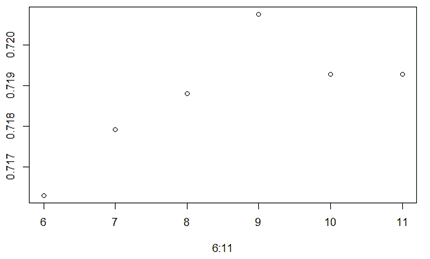

Data with outliers: mtry hyperparameter tuning

A new model was then made and defined by the best performing hyperparameters. This model was tested on the test set, and subsequently on the out of sample dataset. The accuracy increased to** 72.49% from 71.73%.**

In [ ]:
# Checking the new model performance by test set
new_pred <- predict(new_model, test_keep_outlier, type = "“class“")
# Checking classification accuracy
test_cm <- confusionMatrix(data = new_pred, reference = test_keep_outlier$signal)
Overall.accuracy <- test_cm$overall["‘Accuracy’"]
Print(overall.accuracy)


In [ ]:
# Get a final accuracy using out of sample set
oos_pred <- predict(new_model, oos_keep_outlier, type = “class“)
# Checking classification accuracy
oos_cm <- confusionMatrix(data = oos_pred, reference = oos_keep_outlier$signal)
Overall.accuracy <- oos_cm$overall[‘Accuracy’]
Print(overall.accuracy)


## Data without outliers

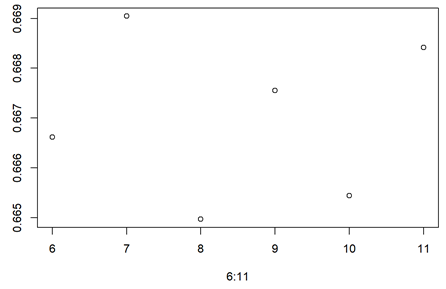

Data without outliers: mtry hyperparameter tuning

In [ ]:
new_pred_1 <- predict(new_model_1, test_remove_outlier, type = "“class“")
# Checking classification accuracy
test_cm_1 <- confusionMatrix(data = new_pred_1, reference = test_remove_outlier$signal)
Overall.accuracy <- test_cm_1$overall["‘Accuracy’"]


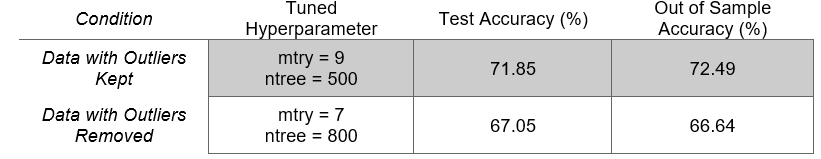

# Findings

The results show that random forest performs better with outliers kept in the data. This can be due to the nature of tree-based machine learning algorithms being robust to outliers and non-linear data. By essentially binning the outliers, their contribution becomes helpful in the training process of the random forest. Hence resulting in higher performance in data with outliers kept rather than removed. 